In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [534]:
df = pd.read_csv('Data/listings_merged.csv')
df

C:\Users\kirit\AppData\Local\Temp\ipykernel_17652\3314642240.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/listings_merged.csv')


,id,name,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,region
0,4.886140e+05,Apartamento acogedor y luminoso en Hendaya,"T2. Charming, cosy and bright apartment, with...",entire rental unit,entire home/apt,4,1.0,1.0,1,"[""hair dryer"", ""essentials"", ""dishes and silve...",...,52,4.850000,4.880000,4.730000,4.980000,4.980000,4.770000,4.790000,0.390000,64
1,1.009530e+05,Villa Etxe Gorria (Room 2) Biarritz center,"Spacious double bedroom, with bathroom, bathtu...",private room in bed and breakfast,private room,2,1.0,1.0,1,"[""hair dryer"", ""first aid kit"", ""essentials"", ...",...,33,4.910000,4.910000,4.940000,4.820000,4.880000,4.940000,4.790000,0.250000,64
2,1.110270e+05,Villa Etxe Gorria (Room 4) Biarritz center,"Bedroom for 2 persons, kettle, double bed, sho...",private room in bed and breakfast,private room,2,1.0,1.0,1,"[""hair dryer"", ""essentials"", ""backyard"", ""refr...",...,99,4.860000,4.900000,4.870000,4.830000,4.780000,4.940000,4.820000,0.630000,64
3,3.272640e+05,Villa de la Corniche on the Basque Coast,"On the Basque Coast, beautiful contemporary an...",entire home,entire home/apt,10,3.5,5.0,6,"[""hair dryer"", ""first aid kit"", ""essentials"", ...",...,53,4.870000,4.830000,4.740000,4.880000,4.890000,4.920000,4.520000,0.360000,64
4,5.079790e+05,On the riverbanks of l'Adour,This apartment is ideally situated just a step...,entire rental unit,entire home/apt,8,1.0,3.0,5,"[""dishes and silverware"", ""oven"", ""refrigerato...",...,46,4.570000,4.600000,4.310000,4.640000,4.710000,4.710000,4.440000,0.350000,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89483,1.238569e+18,"Spacieux studio 4P, porte st cloud",Forget your worries at this spacious (42m2) an...,entire rental unit,entire home/apt,4,1.0,1.0,2,"[""hot water"", ""stove"", ""coffee maker"", ""cleani...",...,1,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,IDF
89484,1.238594e+18,Luxury 3BR Arc Triomphe Champs Élysée,Spacious 3 Bedroom Apartment - Close to Champs...,entire rental unit,entire home/apt,6,2.5,3.0,3,"[""long term stays allowed"", ""dishes and silver...",...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,IDF
89485,1.238756e+18,[F-16] 파리 5인여성 다인실방,Centrally located with the best accessibility.,shared room in rental unit,shared room,1,1.0,NaN,1,"[""wifi"", ""dedicated workspace""]",...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,IDF
89486,1.239121e+18,Large and bright flat nearby Montmartre - Paris,MIDTERM STAY ONLY - Located close to the mythi...,entire rental unit,entire home/apt,1,1.0,NaN,2,"[""hot water"", ""coffee maker"", ""dishes and silv...",...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,IDF


In [535]:
df['beds_and_baths'] = df['bedrooms'] + df['bathrooms']

df.drop(columns=['bedrooms','bathrooms','beds', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'description', 'name', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'region'],axis=1, inplace=True, errors='ignore')

In [536]:
df.isnull().sum()

id                          0
property_type               0
room_type                   0
accommodates                0
amenities                   0
price                       0
latitude                    0
longitude                   0
neighbourhood_cleansed      0
review_scores_rating        0
beds_and_baths            188
dtype: int64

In [537]:
# df["price"] = df["price"].str.replace('$', '').str.replace(',', '').astype(float)

In [538]:
le = LabelEncoder()
catcol = df.select_dtypes(include=['object','bool'])

for x in catcol:
    df[x] = le.fit_transform(df[x])

df

,id,property_type,room_type,accommodates,amenities,price,latitude,longitude,neighbourhood_cleansed,review_scores_rating,beds_and_baths
0,4.886140e+05,20,0,4,25934,94,43.360490,-1.772800,114,4.850000,2.0
1,1.009530e+05,32,2,2,30320,145,43.478710,-1.557670,54,4.910000,2.0
2,1.110270e+05,32,2,2,24981,120,43.479430,-1.559160,54,4.860000,2.0
3,3.272640e+05,16,0,10,29362,450,43.370560,-1.726670,223,4.870000,8.5
4,5.079790e+05,20,0,8,17794,100,43.494550,-1.470500,48,4.570000,4.0
...,...,...,...,...,...,...,...,...,...,...,...
89483,1.238569e+18,20,0,4,49223,77,48.838180,2.257970,184,5.000000,2.0
89484,1.238594e+18,20,0,6,60833,640,48.875698,2.289969,47,4.717753,5.5
89485,1.238756e+18,78,3,1,79930,38,48.865738,2.357416,216,4.717753,NaN
89486,1.239121e+18,20,0,1,38571,43,48.892113,2.360589,72,4.717753,NaN


In [539]:
corr = df.corr()
print(corr['price'])

id                        0.033162
property_type            -0.035113
room_type                -0.055322
accommodates              0.226368
amenities                -0.004791
price                     1.000000
latitude                  0.050179
longitude                 0.009325
neighbourhood_cleansed    0.077298
review_scores_rating      0.008936
beds_and_baths            0.230941
Name: price, dtype: float64


<Axes: >

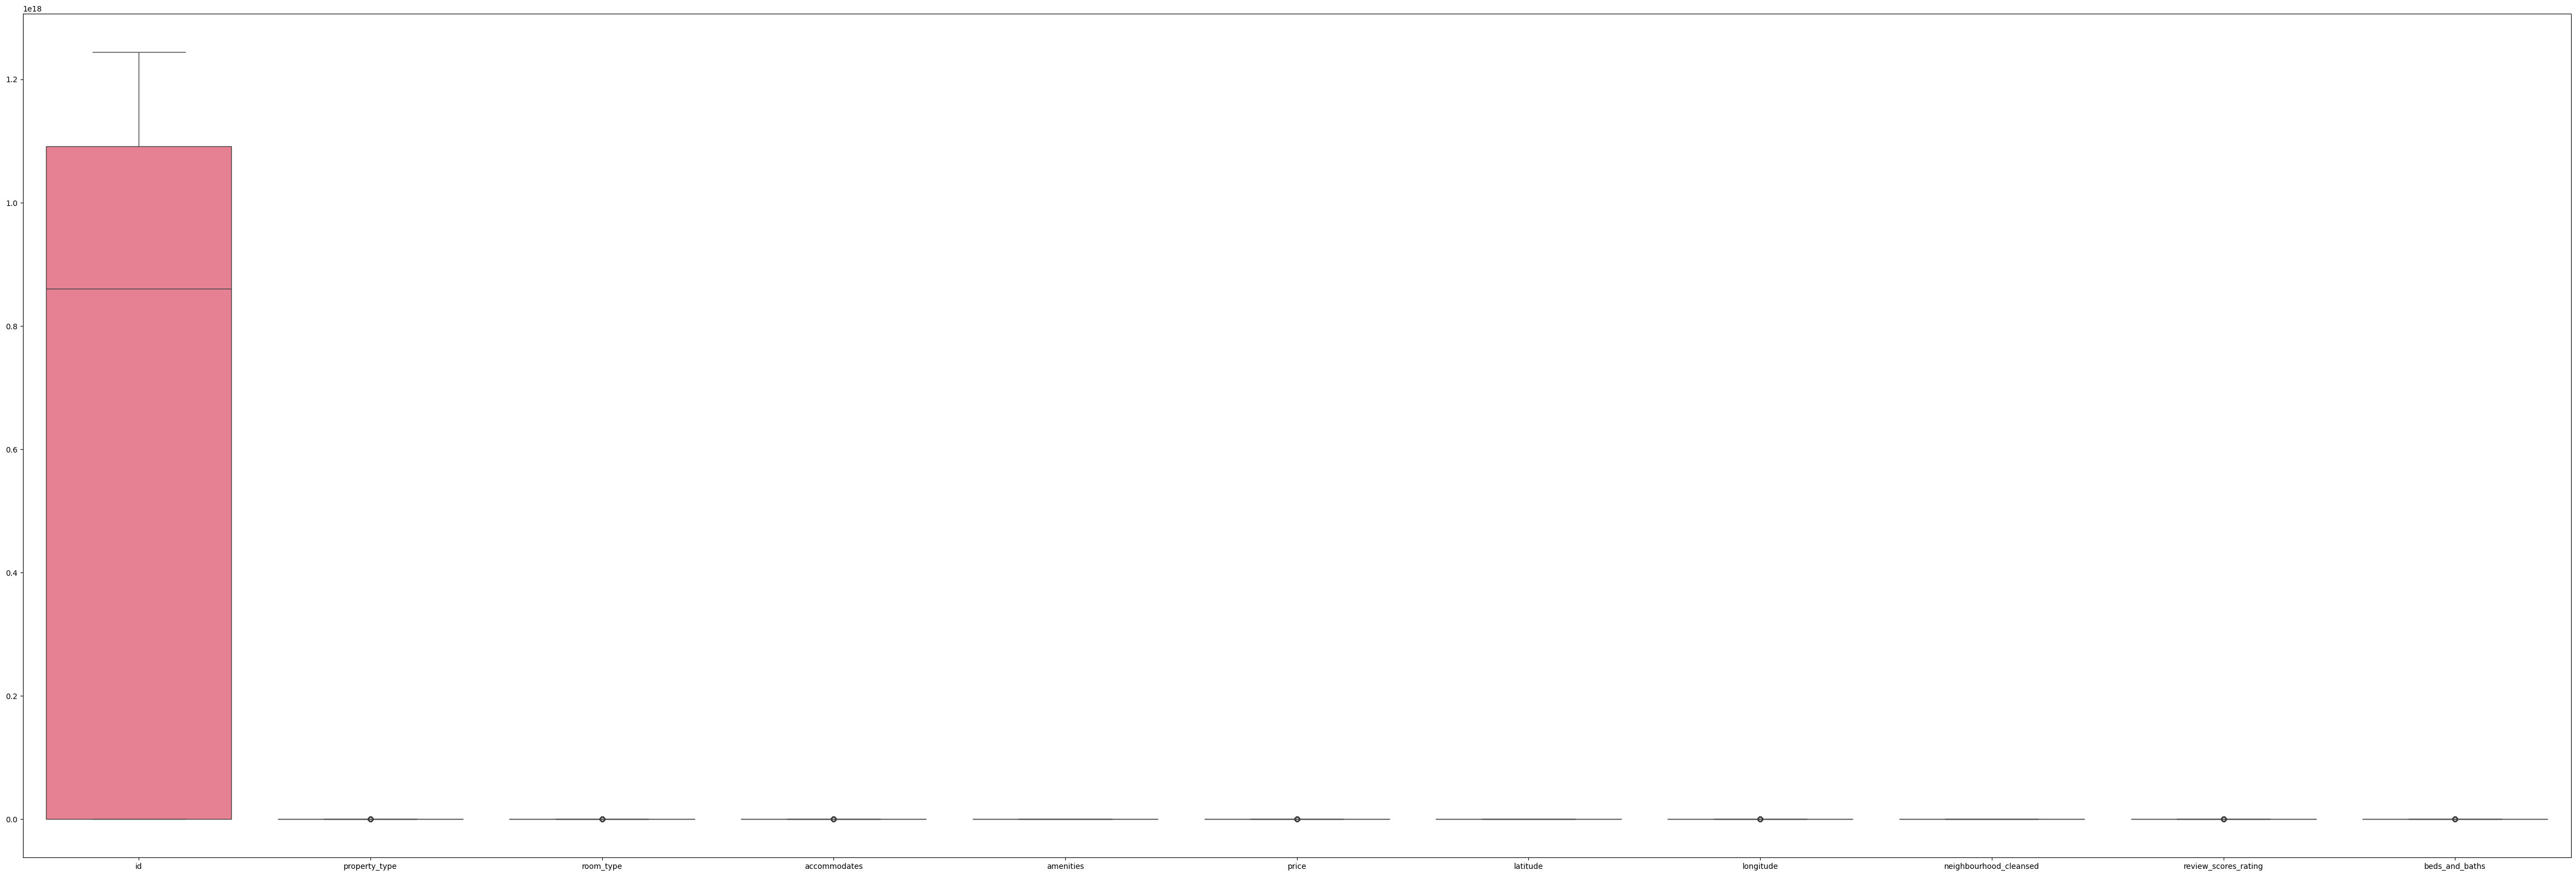

In [540]:
plt.figure(figsize=(60,20))
sns.boxplot(data=df)

In [541]:
pt = PowerTransformer(method='yeo-johnson')
df.skew()

id                        -0.403794
property_type              2.730659
room_type                  2.540281
accommodates               1.674884
amenities                 -0.055050
price                     16.147744
latitude                  -1.148721
longitude                 -0.805119
neighbourhood_cleansed    -0.138398
review_scores_rating      -4.606420
beds_and_baths             4.167530
dtype: float64

In [542]:
cols = (df.drop(columns=['price'], axis=1)).columns
pt = PowerTransformer(method='yeo-johnson')

for x in cols:
    try:
        if df[x].abs().max() > 1e6:
            print(f"Applying log transformation to column {x} due to large values.")
            df[x] = np.log1p(df[x].abs())

        df[x] = pt.fit_transform(df[[x]])
    except Exception as e:
        print(f"Error transforming column {x}: {e}")

print(df.skew())


Applying log transformation to column id due to large values.
id                        -0.654812
property_type             -0.885712
room_type                  2.429617
accommodates               0.039314
amenities                 -0.310793
price                     16.147744
latitude                  -0.975033
longitude                 -0.057215
neighbourhood_cleansed    -0.328890
review_scores_rating      -0.273163
beds_and_baths            -0.077878
dtype: float64


<Axes: >

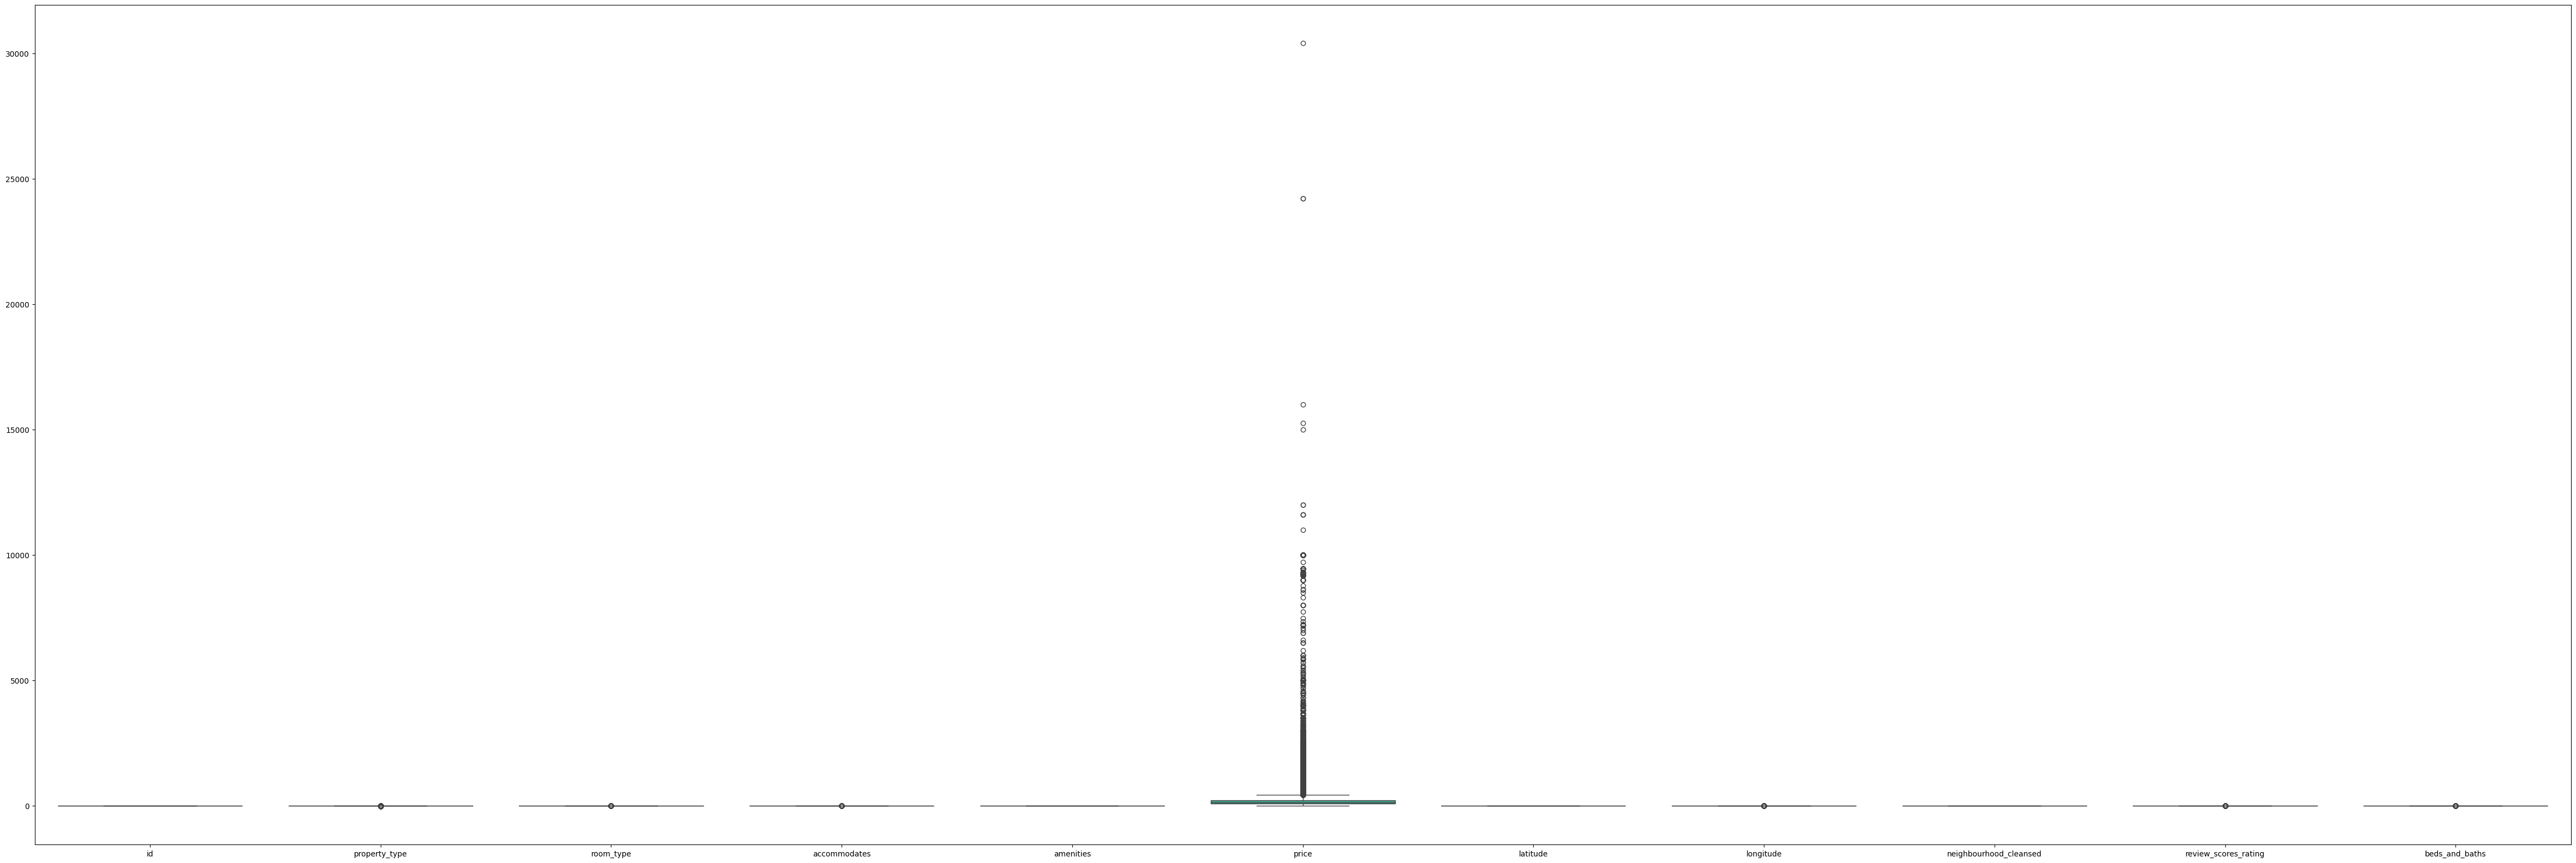

In [543]:
plt.figure(figsize=(60,20))
sns.boxplot(data=df)

In [544]:
df.isnull().sum()

id                          0
property_type               0
room_type                   0
accommodates                0
amenities                   0
price                       0
latitude                    0
longitude                   0
neighbourhood_cleansed      0
review_scores_rating        0
beds_and_baths            188
dtype: int64

In [545]:
df.dropna(subset=['beds_and_baths'],inplace=True)
df['beds_and_baths'].isnull().sum()

0

In [546]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(float(int(df['review_scores_rating'].mean())))
df.isnull().sum()

id                        0
property_type             0
room_type                 0
accommodates              0
amenities                 0
price                     0
latitude                  0
longitude                 0
neighbourhood_cleansed    0
review_scores_rating      0
beds_and_baths            0
dtype: int64

In [547]:
df.drop(columns=['latitude','longitude','id'],axis=1,inplace=True)
df

,property_type,room_type,accommodates,amenities,price,neighbourhood_cleansed,review_scores_rating,beds_and_baths
0,-0.158551,-0.358651,0.553198,-0.595637,94,-0.110632,0.324292,-0.329564
1,1.218666,2.788845,-0.880147,-0.404984,145,-1.027249,0.703820,-0.329564
2,1.218666,2.788845,-0.880147,-0.638179,120,-1.027249,0.384550,-0.329564
3,-0.908016,-0.358651,2.147149,-0.445953,450,1.328167,0.445979,2.507520
4,-0.158551,-0.358651,1.800204,-0.975013,100,-1.128345,-0.962145,1.172338
...,...,...,...,...,...,...,...,...
89481,2.342351,2.788845,0.553198,1.223925,114,0.679457,-0.371756,-0.329564
89482,-0.158551,-0.358651,0.553198,-1.503432,100,-0.401394,-0.371756,-0.329564
89483,-0.158551,-0.358651,0.553198,0.345503,77,0.835348,1.360965,-0.329564
89484,-0.158551,-0.358651,1.312426,0.766617,640,-1.145441,-0.371756,1.781234


In [548]:
df['price_per_room'] = df['price']/df['beds_and_baths']

In [549]:
corr = df.corr()
print(corr['price'])

property_type            -0.027095
room_type                -0.052468
accommodates              0.206337
amenities                -0.005392
price                     1.000000
neighbourhood_cleansed    0.077266
review_scores_rating     -0.003495
beds_and_baths            0.201964
price_per_room           -0.316323
Name: price, dtype: float64


In [550]:
Features = df.drop(columns=['price'],axis=1)
Labels = df['price']

ft, fe, lt, le = train_test_split(Features,Labels, test_size=0.2, random_state=42)

In [551]:
xg = XGBRegressor()
xg.fit(ft, lt)
pred = xg.predict(fe)
print(xg.score(fe,le))

0.6855337619781494


In [552]:
acc = cross_val_score(xg, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print(acc)

[0.62389857 0.79135156 0.86078286 0.85782975 0.83552456 0.53120863
 0.76816702 0.86966878 0.82197201 0.79329294]


In [553]:
r2 = r2_score(le, pred)
print(f"R²: {r2}")

mse = mean_squared_error(le, pred)
print(f"MSE: {mse}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

R²: 0.6855337619781494
MSE: 98192.40195008741
RMSE: 313.3566689095469


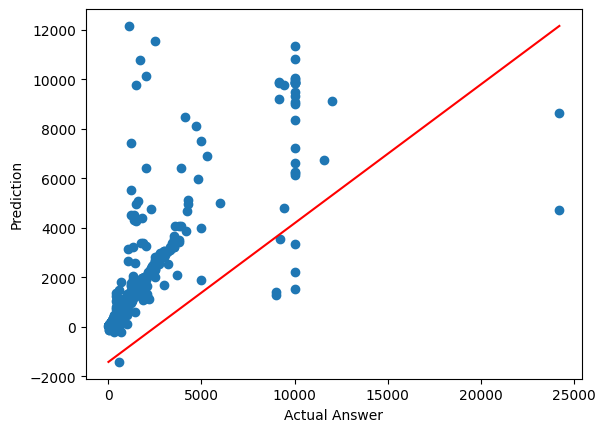

In [554]:
plt.scatter(le, pred)
plt.xlabel('Actual Answer')
plt.ylabel('Prediction')
plt.plot([min(le),max(le)],[min(pred),max(pred)],color='red')

In [555]:
# !jupyter nbconvert --to script model_xgboost.ipynb

In [556]:
test_data = df[['property_type', 'room_type', 'accommodates', 'amenities', 'neighbourhood_cleansed', 'review_scores_rating', 'beds_and_baths', 'price', 'price_per_room']].sample(n=3)
test_data

,property_type,room_type,accommodates,amenities,neighbourhood_cleansed,review_scores_rating,beds_and_baths,price,price_per_room
48632,-0.158551,-0.358651,1.312426,0.260165,-0.736715,-1.186125,1.605595,237,147.608868
58585,-0.158551,-0.358651,-0.880147,-0.154109,1.365290,-0.371756,-0.329564,420,-1274.410764
81451,-0.158551,-0.358651,-0.880147,0.686229,1.426935,-2.105823,-0.329564,182,-552.244665


In [557]:
test_data = test_data.drop(columns=['price'],axis=1)
predictions_python = xg.predict(test_data)
print("Prédictions en Python :", predictions_python)

Prédictions en Python : [226.4025  439.6291  179.30785]


In [558]:
xg.save_model("xgboost_model.bin")

c:\wamp64\www\IPSSI\MIA 2\Statistiques\Tp_Groupe\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:54:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
